# Scrapbook

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
M = np.array([[34,55,67],[89,55,23],[33,22,67],[71,22,55]])

V1 = np.array([[1,2],[7,9], [7,8]])
mean = [np.mean(V1[0]), np.mean(V1[1])]

distance = np.linalg.norm([V1[2], mean])


print('mean:')
print(mean)

print('distance from mean:')
print(distance)






[[ 17.  90.]
 [  1.   3.]
 [100.  99.]]
[[18.25 91.75]
 [ 3.    4.5 ]
 [98.   92.2 ]]


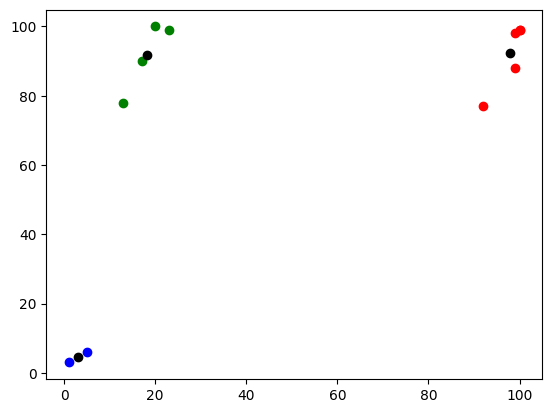

In [143]:
def k_means(X, k, max_iters=100):
    # Initialize centroids with K++ method
    def K_pp(X,k):
        centroids = np.zeros([k, X.shape[1]])
        centroids[0] = centroids[0] + [X[np.random.randint(X.shape[0])]]
        #centroids[0] = np.array([13,78])
        for i in range(k-1):
            #eliminate 0 rows from centroids
            mask_c = (centroids[:, 0] == 0) & (centroids[:, 1] == 0)
            c = centroids[~mask_c]

            # exclude centroids from points to consider:
            mask_x = np.in1d(X[:, 0], centroids[:, 0]) & np.in1d(X[:, 1], centroids[:, 1])
            other_values = X[~mask_x]

            # calculate distance of all points from the centroids
            distances = np.zeros([other_values.shape[0],c.shape[0]])
            for i in range(c.shape[0]):
                distances[:,i] = np.sqrt(np.sum((other_values - c[i,:])**2, axis=1)) 

            total_distance = np.sum(distances, axis=1)

            # find the farthest point and add it to the centroids
            labels = np.argmax(total_distance)
            centroids[i+1]= other_values[labels]
        return centroids
    
    centroids = K_pp(X,k)
    print(centroids)
    for _ in range(max_iters):
        # Assign each data point to the closest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids based on the mean of the assigned data points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(new_centroids == centroids):
            break
        
        centroids = new_centroids
   
    print(centroids)

    
    observations_with_group = np.hstack([X,labels.reshape(len(X),1)])
    colors = ['green','blue','red','violet']
    fig, ax = plt.subplots()
    for el in observations_with_group:
        plt.scatter(el[0], el[1], c=colors[el[2]])

    for c in centroids:
        plt.scatter(c[0],c[1],c='black')
    
observations = np.array([[1,3], [5,6],[20,100], [13,78], [23,99], [17,90], [100,99],[100,99],[92,77],[99,98],[99,88]])
k=3
k_means(observations,k)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=k,random_state=0, n_init='auto').fit(observations)

labels= kmeans.labels_
centroids = kmeans.cluster_centers_
print(labels)
print(centroids)


observations_with_group = np.hstack([observations,labels.reshape(len(observations),1)])
colors = ['green','blue','red','violet']
fig, ax = plt.subplots()
for el in observations_with_group:
    plt.scatter(el[0], el[1], c=colors[el[2]])

for c in centroids:
    plt.scatter(c[0],c[1],c='black')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

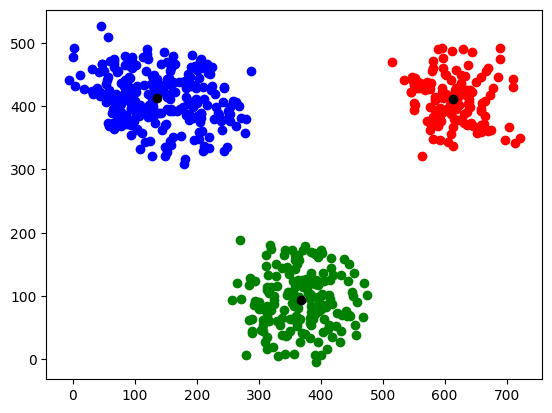

In [145]:
from numpy import genfromtxt
raw_data = genfromtxt('data/k_mean.csv', delimiter=',')

X = raw_data[:,[0,1]]

X = X.astype('int')

kmeans = KMeans(n_clusters=k,random_state=0, n_init='auto').fit(X)

labels= kmeans.labels_
centroids = kmeans.cluster_centers_
print(labels)
print(centroids)


observations_with_group = np.hstack([X,labels.reshape(len(X),1)])
colors = ['green','blue','red','violet']
fig, ax = plt.subplots()
for el in observations_with_group:
    plt.scatter(el[0], el[1], c=colors[el[2]])

for c in centroids:
    plt.scatter(c[0],c[1],c='black')

[[604. 395.]
 [ -7. 441.]
 [392.  -5.]]
[[614.13953488 411.6744186 ]
 [134.88301887 412.68301887]
 [367.66847826  92.96195652]]


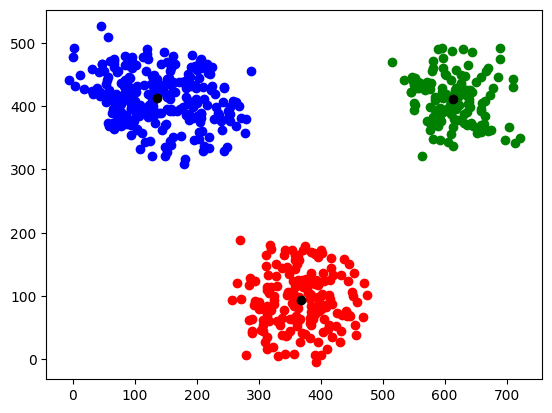

In [151]:
k_means(X,k)

In [ ]:

def K_pp(X,k):
    centroids = np.zeros([k, X.shape[1]])
    centroids[0] = centroids[0] + [X[np.random.randint(X.shape[0])]]
    #centroids[0] = np.array([13,78])
    for i in range(k-1):
        #eliminate 0 rows from centroids
        mask_c = (centroids[:, 0] == 0) & (centroids[:, 1] == 0)
        c = centroids[~mask_c]
        print('centroids to calculate distance from:')
        print(c)

        # exclude centroids from points to consider:
        mask_x = np.in1d(X[:, 0], centroids[:, 0]) & np.in1d(X[:, 1], centroids[:, 1])
        other_values = X[~mask_x]
        print('other values:')
        print(other_values)

        distances = np.zeros([other_values.shape[0],c.shape[0]])
        print('distances before iteration:')
        print(distances)
        for i in range(c.shape[0]):
            distances[:,i] = np.sqrt(np.sum((other_values - c[i,:])**2, axis=1)) 

        print(distances)
        total_distance = np.sum(distances, axis=1)
        labels = np.argmax(total_distance)
        print(labels)

        centroids[i+1]= other_values[labels]
        print('centroids after iteration:')
        print(centroids)

    return centroids

X = np.array([[1,3], [5,6],[20,100], [13,78], [23,99], [17,90], [100,99],[100,99],[92,77],[99,98],[99,88]])
k=3

K_pp(X,k)

In [ ]:
V1 = np.array([1,1])
V2 = np.array([10,10])
V3 = np.array([2,2])
V4 = np.array([0,5])

fig, ax = plt.subplots()
plt.scatter(V1[0], V1[1], c=colors[el[2]])
plt.scatter(V2[0], V2[1], c=colors[el[2]])
plt.scatter(V3[0], V3[1], c=colors[el[2]])
plt.scatter(V4[0], V4[1], c=colors[el[2]])



data  = np.array([[1,1],[2,2],[0,5]])
centroids = np.array([[10,10]])

distances = np.sqrt(np.sum((data - centroids)**2, axis=1))
farthest_index = np.argmax(distances)

print(distances)
print(farthest_index)



In [107]:
def K_pp(X,k):
    centroids = np.zeros([k, X.shape[1]])
    centroids[0] = centroids[0] + [X[np.random.randint(X.shape[0])]]
    #centroids[0] = np.array([13,78])
    for i in range(k-1):
        #eliminate 0 rows from centroids
        mask_c = (centroids[:, 0] == 0) & (centroids[:, 1] == 0)
        c = centroids[~mask_c]

        # exclude centroids from points to consider:
        mask_x = np.in1d(X[:, 0], centroids[:, 0]) & np.in1d(X[:, 1], centroids[:, 1])
        other_values = X[~mask_x]

        # calculate distance of all points from the centroids
        distances = np.zeros([other_values.shape[0],c.shape[0]])
        for i in range(c.shape[0]):
            distances[:,i] = np.sqrt(np.sum((other_values - c[i,:])**2, axis=1)) 

        total_distance = np.sum(distances, axis=1)

        # find the farthest point and add it to the centroids
        labels = np.argmax(total_distance)
        centroids[i+1]= other_values[labels]

    return centroids

X = np.array([[1,3], [5,6],[20,100], [13,78], [23,99], [17,90], [100,99],[100,99],[92,77],[99,98],[99,88]])
k=3

K_pp(X,k)

array([[  1.,   3.],
       [100.,  99.],
       [ 20., 100.]])